# 빅카인드 웹크롤링

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException

driver=webdriver.Chrome('C:/chromedriver')
driver.get('https://www.bigkinds.or.kr/')
# driver.find_element_by_xpath('//*[@id="contents"]/div[3]/div/div[2]/div/div[2]/button').click()
driver.implicitly_wait(3)

n_data = []

### 로그인 과정

In [2]:
driver.find_element_by_xpath('//*[@id="app-top-navbar"]/ul/li[1]/a').click()
log_id = driver.find_element_by_id('login-user-id')
log_id.send_keys('webcrawl04@gmail.com')

log_pass = driver.find_element_by_id('login-user-password')
log_pass.send_keys('950628!!')
driver.find_element_by_id('login-btn').click()
time.sleep(1)

### 기간조정과정

In [3]:
driver.find_element_by_id('date-filter-btn').click()
begin_d = driver.find_element_by_id('search-begin-date')
begin_d.send_keys(Keys.HOME)
begin_d.send_keys('2015-01-01')
begin_d.send_keys(Keys.TAB)
end_d = driver.find_element_by_id('search-end-date')
end_d.send_keys(Keys.HOME)
end_d.send_keys('2015-12-31')
begin_d.send_keys(Keys.TAB)
driver.find_element_by_id('date-filter-btn').click()

### 검색어 입력과정

In [267]:
#검색어입력
keyword = ''
search = driver.find_element_by_id('total-search-key')
search.send_keys(keyword)
search.send_keys(Keys.RETURN)

In [268]:
#100건씩 보기
driver.find_element_by_xpath('//*[@id="collapse-step-2"]/div/div/div[2]/div[2]/div/div[2]/div[2]/select').click()
driver.find_element_by_xpath('//*[@id="collapse-step-2"]/div/div/div[2]/div[2]/div/div[2]/div[2]/select/option[4]').click()
time.sleep(0.5)

In [269]:
def crawl_nextpage(i=3):
    while True:
        address = '//*[@id="news-results-pagination"]/ul/li[' + f'{i}' + ']/a'
        i += 1
        try:
            data= driver.find_elements_by_css_selector("div.news-item__body h4")    
            for r in data:
                n_data.append(r.text)
            time.sleep(0.5) 
            driver.find_element_by_xpath(address).click()
            time.sleep(4)
        except NoSuchElementException:
            break;

In [270]:
while True:
    #페이지갯수
    lst = driver.find_elements_by_css_selector('#news-results-pagination > ul > li')
    len(lst)
    print(len(lst)-3)
    if len(lst)==10:
        crawl_nextpage()
        i=3
    else:
        crawl_nextpage()
        break;

7


In [323]:
# n_data

# 처리

In [324]:
#숫자와 문자만 따로 빼서 저장(특수문자 및 이모티콘 제외)
import re
news_lst=[]
for i in n_data:
    i = re.sub('[^0-9a-zA-Zㄱ-힗]', ' ', i) #e.sub() 함수는 문자열에서 매치된 텍스트를 다른 텍스트로 치환할 때 사용
    news_lst.append(i)
# news_lst

In [332]:
n_lst = []
for news in news_lst:
    if ('중복' not in news) and ('예외' not in news):
        n_lst.append(news)

# re.search(pattern, '즐거운 파이썬')

TypeError: Must pass values for either `x` or `y`

In [ ]:
pd.DataFrame(n_lst).to_csv(path + f'{keyword} 웹크롤링.csv', encoding='cp949', index=False)

In [ ]:
##################################

# 자연어처리

In [ ]:
뉴스크롤링 = pd.read_csv(path + f'{keyword} 웹크롤링.csv', encoding='cp949')

In [338]:
# import seaborn as sns
# df = pd.DataFrame(data=n_lst, columns=['title'])
# sns.countplot(data=df.title)

TypeError: Must pass values for either `x` or `y`

In [290]:
import pandas as pd
import nltk
from konlpy.tag import Komoran
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
komoran = Komoran()
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

C:\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [ ]:
n_lst = 뉴스크롤링.tolist()

In [326]:
newstring=''
for i in range(len(n_lst)):
    newstring += n_lst[i]
# newstring

In [304]:
noun_lst=[]
nouns = komoran.nouns(newstring)
for i in nouns:
    if len(i)>1:
        noun_lst.append(i)

In [303]:
adj_lst=[]
for i in komoran.pos(newstring):
    if (i[1]=='VA')&(len(i)>1):
        adj_lst.append(i[0])

In [302]:
nounadj = noun_lst + adj_lst
nounadj_lst=[]
for i in nounadj:
    if len(i)>1:
        nounadj_lst.append(i)

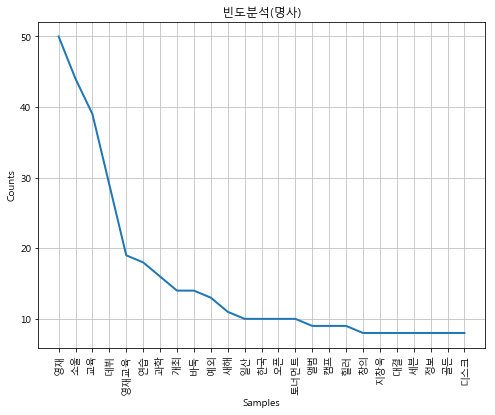

<Figure size 432x288 with 0 Axes>

In [305]:
#명사 빈도분석그래프
tokens = noun_lst
vocab = nltk.Text(tokens)
plt.figure(figsize=(8,6))
plt.title('빈도분석(명사)')
vocab.plot(25)
plt.savefig('빈도분석(명사).png',transparent=True)

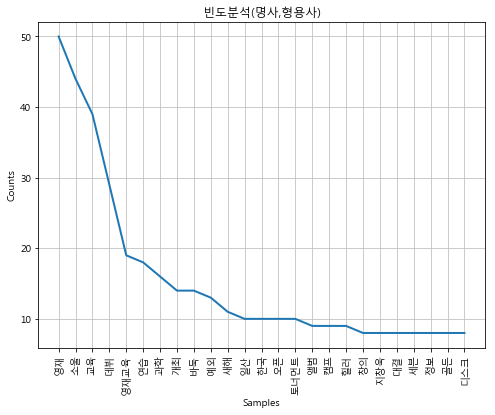

<Figure size 432x288 with 0 Axes>

In [306]:
#명사형용사 빈도분석그래프
tokens = nounadj_lst
vocab = nltk.Text(tokens)
plt.figure(figsize=(8,6))
plt.title('빈도분석(명사,형용사)')
vocab.plot(25)
plt.savefig('빈도분석(명사,형용사).png',transparent=False)

# 워드클라우드

In [315]:
불용어 = set(['불용어 설정'])

In [313]:
#하나의 문자열로 만든다.
text_noun = ' '.join(noun_lst)
text_nounadj = ' '.join(nounadj_lst)

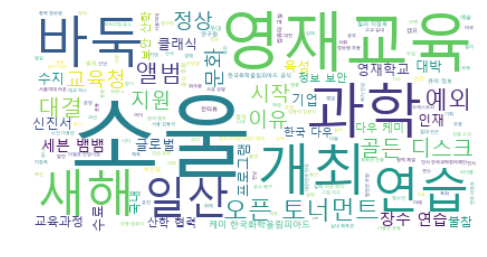

In [314]:
#워드클라우드(명사)
wordc = WordCloud(background_color='white',font_path='C:/Windows/Fonts/malgun.ttf', relative_scaling=0.5, stopwords=불용어)
wordc.generate(text_noun)
plt.figure(figsize=(8,6))
plt.imshow(wordc, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('워드클라우드(명사).png',transparent=False)

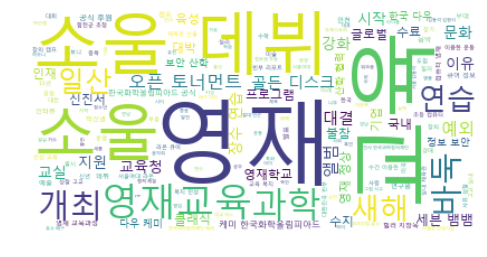

In [311]:
#워드클라우드(명사,형용사)
wordc = WordCloud(background_color='white',font_path='C:/Windows/Fonts/malgun.ttf', relative_scaling=0.5, stopwords=불용어)
wordc.generate(text_nounadj)
plt.figure(figsize=(8,6))
plt.imshow(wordc, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('워드클라우드(명사,형용사).png',transparent=False)

In [ ]:
# 리스트의 리스트 형식으로 만들면 연관분석 가능.
#한 제목 안에서 명사를 추출하고, 이를 리스트로 만드는 것이 필요

## 자연어 처리

In [ ]:
# import pandas as pd
# import konlpy
# from apyori import apriori
# from itertools import chain
# sbs=pd.DataFrame(sbs_news)
# komoran=konlpy.tag.Komoran()

# sbs_8=[]
# for i,j in enumerate(sbs['8월']):
#     words=(list(filter(lambda word: len(word)>1,
#                        komoran.nouns('%r'%j))))
#     sbs_8.append(words)

# pd.DataFrame(sbs_8).to_csv('sbs_8.csv', encoding='utf-8', index=False)

In [ ]:
# import pandas as pd
# import konlpy
# from apyori import apriori
# import csv
# with open('sbs_4.csv', 'r', encoding='utf-8') as cf:
#     sbs_4_1=[]
#     r=csv.reader(cf)
#     for row in r:
#         sbs_4_1.append(row)
# rules=apriori(sbs_4_1, min_support=0.3, min_confidence=0.3)
# result=list(rules)
# result_df=pd.DataFrame(None, columns=['lhs','rhs','support','confidence','lift'])
# index=0
# for row in result:
#     support=row[1]
#     ordered_stat=row[2]
#     for ordered_item in ordered_stat:
#         lhs=' '.join(x.strip() for x in ordered_item[0])
#         rhs=' '.join(x.strip() for x in ordered_item[1])
#         confidence=ordered_item[2]
#         lift=ordered_item[3]
#         result_df.loc[index]=[lhs,rhs,support,confidence,lift]
#         index=index+1
# result_df.sort_values('lift',ascending=False)

In [ ]:
# import pandas as pd
# import konlpy
# from apyori import apriori
# import csv
# with open('sbs_8.csv', 'r', encoding='utf-8') as cf:
#     sbs_8_1=[]
#     r=csv.reader(cf)
#     for row in r:
#         sbs_8_1.append(row)
# rules=apriori(sbs_8_1, min_support=0.3, min_confidence=0.3)
# result=list(rules)
# result_df=pd.DataFrame(None, columns=['lhs','rhs','support','confidence','lift'])
# index=0
# for row in result:
#     support=row[1]
#     ordered_stat=row[2]
#     for ordered_item in ordered_stat:
#         lhs=' '.join(x.strip() for x in ordered_item[0])
#         rhs=' '.join(x.strip() for x in ordered_item[1])
#         confidence=ordered_item[2]
#         lift=ordered_item[3]
#         result_df.loc[index]=[lhs,rhs,support,confidence,lift]
#         index=index+1
# result_df.sort_values('lift',ascending=False)

In [ ]:
# result_df.loc[(result_df.lhs.str.contains('일본'))&
#              (result_df.rhs=='규제')].sort_values(by=['lift'],
#                                                ascending=False)